In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import utils as np_utils


# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


2024-08-27 15:33:12.075748: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 15:33:12.085740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 15:33:12.097153: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 15:33:12.100497: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 15:33:12.109593: I tensorflow/core/platform/cpu_feature_guar

![Screenshot from 2024-08-27 16-05-20.png](<attachment:Screenshot from 2024-08-27 16-05-20.png>)
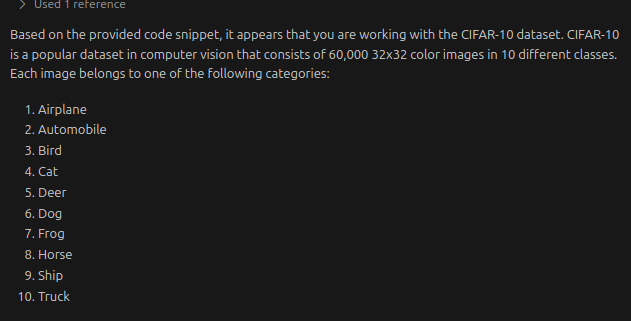

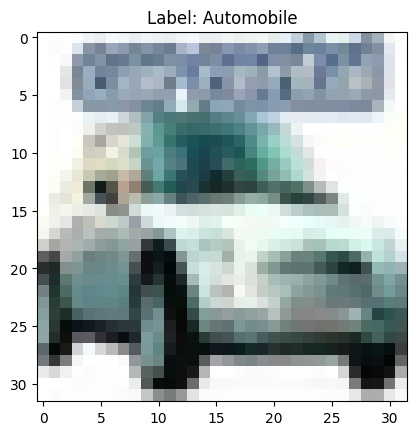

In [70]:
import matplotlib.pyplot as plt

def show_cifar10_image(X, y, index):
    # List of category names for CIFAR-10 dataset
    category_names = [
        "Airplane", "Automobile", "Bird", "Cat", "Deer",
        "Dog", "Frog", "Horse", "Ship", "Truck"
    ]
    
    # Get the numerical label for the specified image
    label_index = y[index][0]

    # Get the category name corresponding to the numerical label
    category_name = category_names[label_index]

    # Display the image with the category name as the title
    plt.imshow(X[index])
    plt.title(f"Label: {category_name}")
    plt.show()

# Example usage
show_cifar10_image(X_train, y_train, 40000)


In [5]:
# import os
# import matplotlib as plt
# # Create train and test directories if they don't exist
# train_dir = 'train'
# test_dir = 'test'
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Save images to train directory
# for i in range(len(X_train)):
#     image_path = os.path.join(train_dir, f"{i}.png")
#     plt.image.imsave(image_path, X_train[i])

# # Save images to test directory
# for i in range(len(X_test)):
#     image_path = os.path.join(test_dir, f"{i}.png")
#     plt.image.imsave(image_path, X_test[i])


In [6]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


![Screenshot from 2024-08-27 15-37-00.png](<attachment:Screenshot from 2024-08-27 15-37-00.png>)
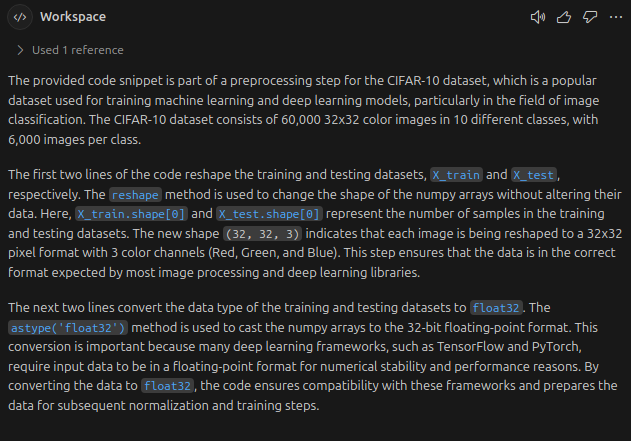

In [7]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [10]:
import tensorflow as tf# Configure TensorFlow to use the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

In [12]:
# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10


I0000 00:00:1724762733.366996   22914 service.cc:146] XLA service 0x79e5cc00ce80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724762733.367039   22914 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-08-27 15:45:33.405913: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-27 15:45:33.575612: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-27 15:45:33.779680: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward co

 13/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.0934 - loss: 57.4922

I0000 00:00:1724762737.647143   22914 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1559 - loss: 7.0504

2024-08-27 15:45:47.841257: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_92', 424 bytes spill stores, 424 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.1561 - loss: 7.0399 - val_accuracy: 0.4417 - val_loss: 1.5468
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4090 - loss: 1.6281 - val_accuracy: 0.5227 - val_loss: 1.3635
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4973 - loss: 1.3920 - val_accuracy: 0.5786 - val_loss: 1.1949
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5615 - loss: 1.2312 - val_accuracy: 0.6248 - val_loss: 1.1115
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6095 - loss: 1.1125 - val_accuracy: 0.6679 - val_loss: 0.9780
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6419 - loss: 1.0226 - val_accuracy: 0.6870 - val_loss: 0.9163
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6689 - loss: 0.9525 - val_accuracy: 0.7036 - val_loss: 0.8690
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6926 - loss: 0.8828 - val_accuracy: 0.69

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 75)     │        33,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 125)    │        84,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 125)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 125)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,743,957 (48.61 MB)

 Trainable params: 4,247,985 (16.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,495,972 (32.41 MB)

In [71]:
# Save the model as a pickle file
model.save('cifar10.keras')

![Screenshot from 2024-08-27 17-12-06.png](<attachment:Screenshot from 2024-08-27 17-12-06.png>)
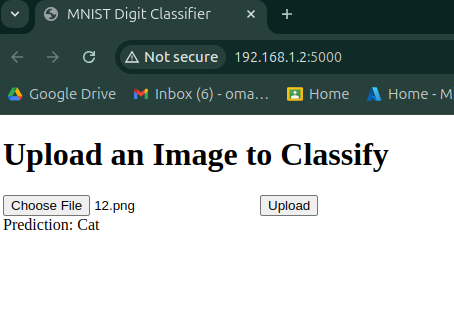